<a href="https://colab.research.google.com/github/asadimtiazmalik/Simulating-the-Superfluid-Dark-Matter-using-PyAutolens/blob/main/Simulating_Superfluid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is important to set up the workspace before starting our simulation. For that we need install **PyAutolens** for simulating the super fluid dark matter.

In [2]:
!pip install autolens

     |████████████████████████████████| 184kB 5.4MB/s 
     |████████████████████████████████| 1.6MB 11.4MB/s 
     |████████████████████████████████| 296kB 21.4MB/s 
     |████████████████████████████████| 389kB 30.1MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 102kB 8.3MB/s 
     |████████████████████████████████| 25.9MB 172kB/s 
     |████████████████████████████████| 1.3MB 35.3MB/s 
     |████████████████████████████████| 92kB 7.3MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 174kB 51.6MB/s 
     |████████████████████████████████| 512kB 49.4MB/s 
     |████████████████████████████████| 16.2MB 248kB/s 
     |████████████████████████████████| 174kB 45.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled s

In [3]:
from os import path 
import autolens as al
import autolens.plot as aplt

For simulating an image we first need to model the telescope optics. That is done by convolving the image with a Point Spread Function.

In [51]:
psf = al.Kernel2D.from_gaussian(shape_native=(11, 11), sigma=0.1, pixel_scales=0.1)

We need to setup our Grid that will be deflected and traced by the lensing system

In [52]:
grid = al.Grid2D.uniform(shape_native = (150,150), pixel_scales = 0.1, sub_size = 2)

Strong Gravitational Lensing is done by setting up a light profile in the Source galaxy and a mass profile in a Lens galaxy. The viewer receives the light from source that is being deflected by the mass profile of the lens galaxy. 

Since we are dealing with superfluid dark matter which can also be considered as a string of mass where the mass density is constant through out the string, giving the lensing galaxy a mass profile of **point mass** seemed more appropriate. For that purpose I used `al.mp.PointMass`. 

To make the effects of the lensing more realistic I have given the lensing galaxy a light profile as well as a mass profile.

In [128]:
# Lens Galaxy
lens_galaxy = al.Galaxy(
    redshift = 0.5,
    # By using the length of the vortex available in the paper I calculated the Einstein Radius to be around 0.048
    mass = al.mp.PointMass((0.5, 0.5), einstein_radius=0.048), #0.048
    bulge = al.lp.EllipticalSersic(
        centre=(0.0, 0.0),
        elliptical_comps=(0.0, 0.111111),
        intensity=1.0,
        effective_radius=0.5,
        sersic_index=2.5,
    ),
    
)


The Source Galaxy contains and elliptical sersic ligth profile.

In [91]:
# Source Galaxy 
source_galaxy = al.Galaxy(
    redshift=1.0,
    bulge=al.lp.EllipticalSersic(
        centre=(0.1, 0.1),
        elliptical_comps=(0.0, 0.111111),
        intensity=1.0,
        effective_radius=1.0,
        sersic_index=2.5,
    ),
)

In [129]:
# Tracer Object
tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

The image below shows the plot of the ray traced by the plotter using the lens galaxy and the source galaxy. This shows how the superfluid appears. But as you can see this image is not realistic and also contains the light from the lens galaxy.

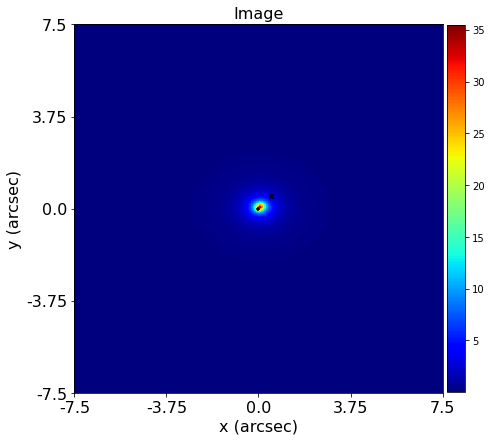

In [130]:
tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=grid)
tracer_plotter.figures(image=True)

In [131]:
normal_image = tracer.image_from_grid(grid=grid)
padded_image = tracer.padded_image_from_grid_and_psf_shape(
    grid=grid, psf_shape_2d=psf.shape_native
)

print(normal_image.shape_native)
print(padded_image.shape_native)

(150, 150)
(160, 160)


Our simulator doesn't just plot the image but also gives it a real feel. As if the image was viewed from earth. Therefore, background noise is added to the `Simulator` object.

In [132]:
simulator = al.SimulatorImaging(
    exposure_time=300.0, psf=psf, background_sky_level=0.1, add_poisson_noise=True
)

imaging = simulator.from_tracer_and_grid(tracer=tracer, grid=grid)

The cell below shows the result of our simulation.

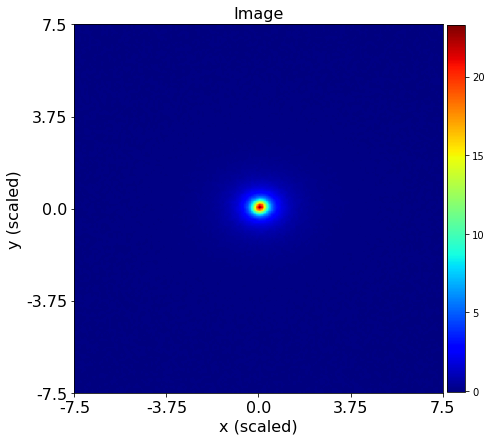

In [133]:
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures(image=True)

Inorder to filter out the background noise from the image we must develope a mask. 

In [134]:
mask = al.Mask2D.circular(
    shape_native=imaging.shape_native,
    pixel_scales=imaging.pixel_scales,
    sub_size=1,
    radius=2.5,
)

In [135]:
masked_imaging = al.MaskedImaging(imaging=imaging, mask=mask)

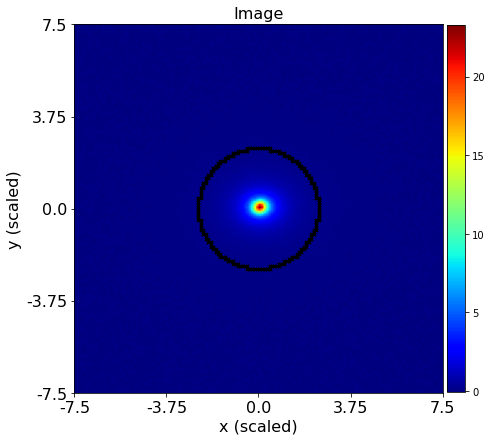

In [136]:
visuals_2d = aplt.Visuals2D(mask=mask)

imaging_plotter = aplt.ImagingPlotter(imaging=imaging, visuals_2d=visuals_2d)
imaging_plotter.figures(image=True)

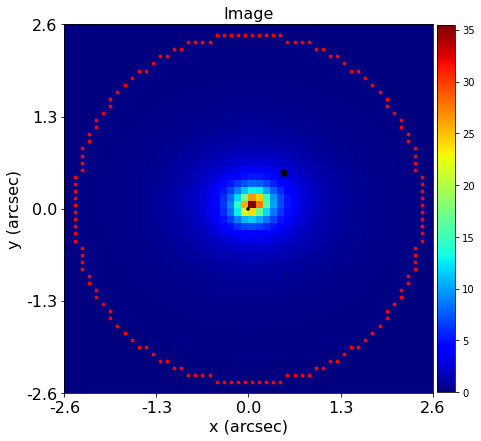

In [137]:
# Lens Galaxy
lens_galaxy = al.Galaxy(
    redshift = 0.5,
    mass = al.mp.PointMass((0.5, 0.5), einstein_radius=0.048), #0.048
    bulge = al.lp.EllipticalSersic(
        centre=(0.0, 0.0),
        elliptical_comps=(0.0, 0.111111),
        intensity=1.0,
        effective_radius=0.5,
        sersic_index=2.5,
    ),
    
)

# Source Galaxy 
source_galaxy = al.Galaxy(
    redshift=1.0,
    bulge=al.lp.EllipticalSersic(
        centre=(0.1, 0.1),
        elliptical_comps=(0.0, 0.111111),
        intensity=1.0,
        effective_radius=1.0,
        sersic_index=2.5,
    ),
)

# Tracer Object
tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=masked_imaging.grid)
tracer_plotter.figures(image=True)


To see how well our lens performed in simulating the image we need to fit the images. This gives us the diagnostics of how well our simulator performed.

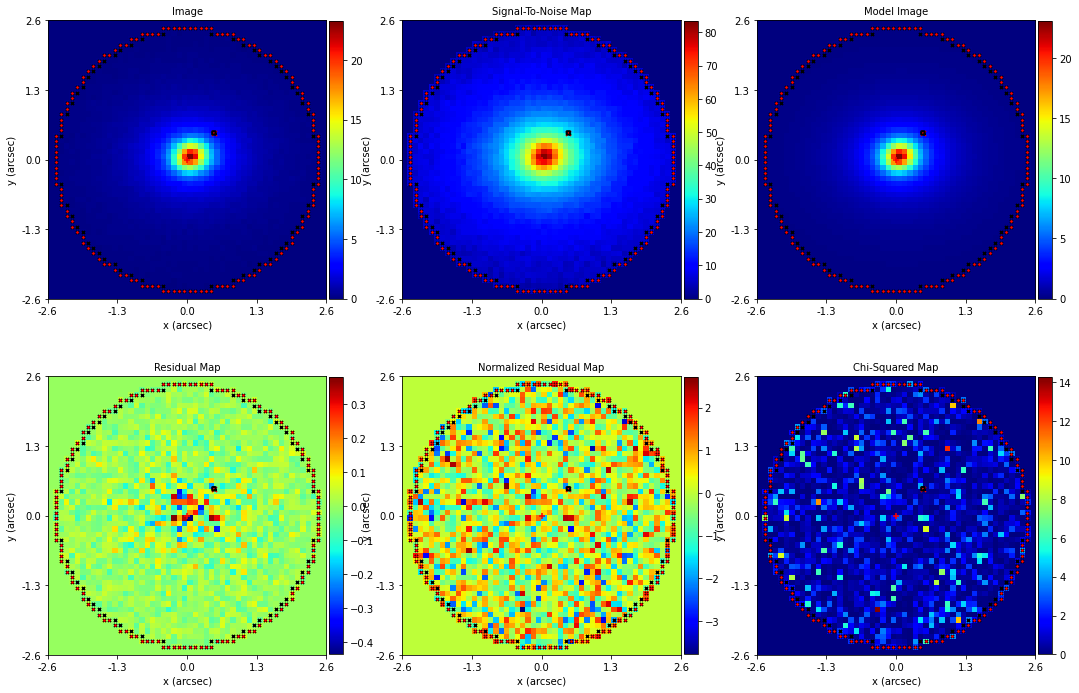

In [138]:
fit = al.FitImaging(masked_imaging=masked_imaging, tracer=tracer)

include_2d = aplt.Include2D(mask=True)

fit_imaging_plotter = aplt.FitImagingPlotter(fit=fit, include_2d=include_2d)
fit_imaging_plotter.subplot_fit_imaging()

A good simulation usually has a high `log_likelihood` 

In [139]:
print(fit.log_likelihood)

3308.237064746145


In [140]:
dataset_name = "vortex_profiles"
dataset_path = path.join("/content/drive", "MyDrive", "imaging", dataset_name)

imaging.output_to_fits(
    image_path=path.join(dataset_path, "image.fits"),
    noise_map_path=path.join(dataset_path, "noise_map.fits"),
    psf_path=path.join(dataset_path, "psf.fits"),
    overwrite = True,
)

PyAutolens helps choose the best `log_likelihood` for us. This will ensure that our simulation is the best possible representation of the superfluid dark matter.


In [141]:
import autofit as af

In [142]:
dataset_name = "vortex_profiles"
dataset_path = path.join("/content/drive", "MyDrive", "imaging", dataset_name)


imaging = al.Imaging.from_fits(
    image_path=path.join(dataset_path, "image.fits"),
    noise_map_path=path.join(dataset_path, "noise_map.fits"),
    psf_path=path.join(dataset_path, "psf.fits"),
    pixel_scales=0.1,
)

Here I am using the `imaging` data generated from the simulation and feeding it to a `NonLinearSearch` object. This finds the best possible log likelihood for us which can be taken as the best possible simulated image.

In [143]:
lens_galaxy_model = al.GalaxyModel(redshift=0.5, mass=al.mp.PointMass, bulge = al.lp.EllipticalSersic)

In [144]:
source_galaxy_model = al.GalaxyModel(redshift=1.0, bulge=al.lp.EllipticalSersic)

In [145]:
mask = al.Mask2D.circular(
    shape_native=imaging.shape_native, pixel_scales=imaging.pixel_scales, radius=2.5
)

In [146]:
settings_masked_imaging = al.SettingsMaskedImaging(grid_class=al.Grid2D, sub_size=2)

settings = al.SettingsPhaseImaging(settings_masked_imaging=settings_masked_imaging)

In [150]:
phase = al.PhaseImaging(
    search=af.DynestyStatic(
        path_prefix="perfect_fit", name="vortex", n_live_points=80
    ),
    settings=settings,
    galaxies=af.CollectionPriorModel(
        lens_galaxy=lens_galaxy_model, source_galaxy=source_galaxy_model
    ),
)

The result object contains all the information about our simulated image that was fitted.

In [151]:
result = phase.run(dataset = imaging, mask = mask)

INFO:root:Generating initial samples of model, which are subject to prior limits and other constraints.
/usr/local/lib/python3.7/dist-packages/dynesty/dynesty.py:373: UserWarning: A note of caution: having `nlive < ndim * (ndim + 1) // 2` may result in unconstrained bounding distributions.
  warnings.warn("A note of caution: "
INFO:root:No Dynesty samples found, beginning new non-linear search. 
272it [00:48,  1.49s/it, bound: 0 | nc: 199 | ncall: 2754 | eff(%):  9.877 | loglstar:   -inf < -219388.968 <    inf | logz: -219397.422 +/-  5.089 | dlogz: 133951.936 >  0.089]/usr/local/lib/python3.7/dist-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
285it [00:50,  7.19it/s, bound: 2 | nc: 5 | ncall: 2820 | eff(%): 10.106 | loglstar:   -inf < -214128.311 <    inf | logz: -214136.927 +/-  5.089 | dlogz: 146377.261 >  0.089]/usr/local/l

The set of images below shows the best possible fitted images. 

The results demonstrates the strong lensing from a superfluid dark matter.

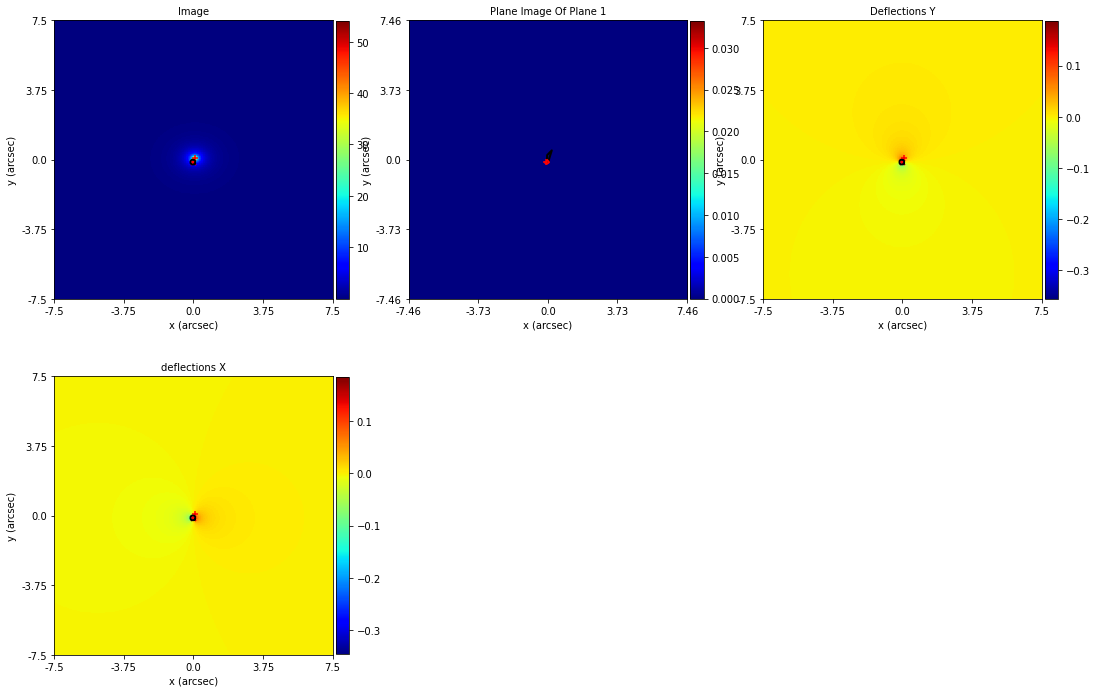

In [152]:
tracer_plotter = aplt.TracerPlotter(
    tracer=result.max_log_likelihood_tracer, grid=mask.unmasked_grid_sub_1
)
tracer_plotter.subplot_tracer()

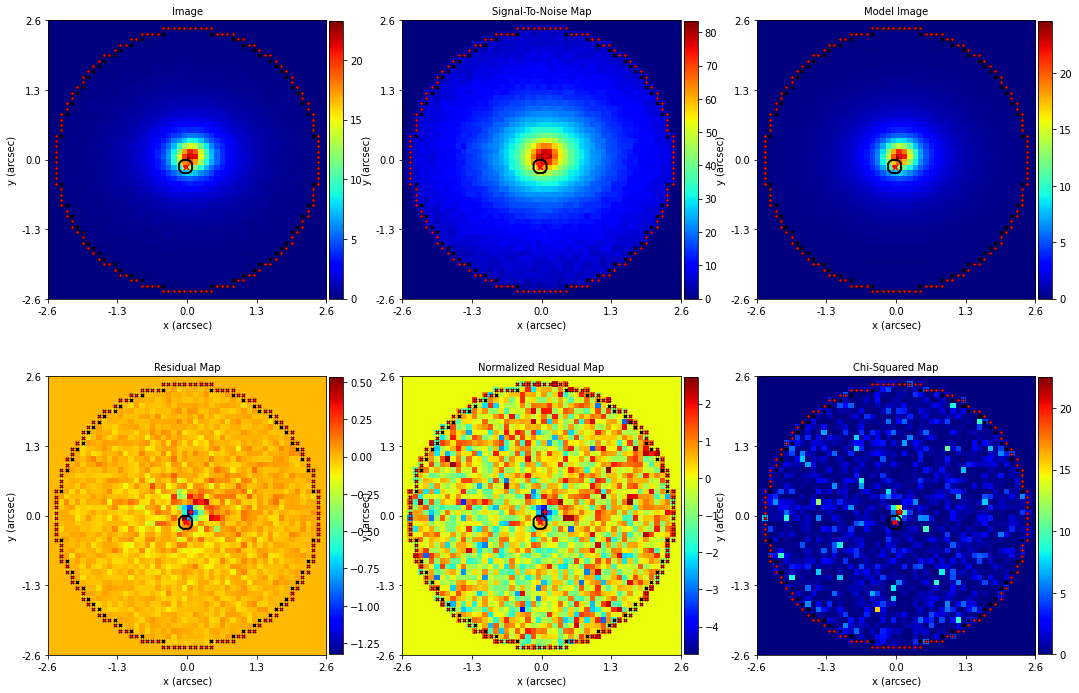

In [153]:
fit_imaging_plotter = aplt.FitImagingPlotter(fit=result.max_log_likelihood_fit)
fit_imaging_plotter.subplot_fit_imaging()